In [1]:
import convml_tt
from convml_tt.system import TripletTrainerModel, TripletTrainerDataModule

from convml_tt.data.dataset import TileType

import pytorch_lightning as pl

convml_tt.__version__


'0.14.1'

### Finetune the convml model

In [ ]:

# Need to sort dataset into study and train folders
#dataset_path = "/home/eefjg/OneDrive/Leeds/PhD/Data/MODIS/Aqua1kmLabSea2022/triplets"

dataset_path = "/home/eefjg/OneDrive/Leeds/SENSE_Training/Leeds/Clouds/SENSE_convml_tt/notebooks/data/Nx256_s200000.0_N500study_N2000train"
datamodule = TripletTrainerDataModule(data_dir=dataset_path, batch_size=16, normalize_for_arch="resnet")

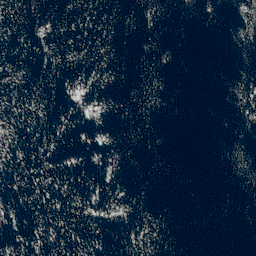

In [14]:
# NB index in example notebook is now tile_id
datamodule.get_dataset(stage="fit").get_image(tile_id=0, tile_type=TileType.ANCHOR)

In [8]:
datamodule

In [15]:
model = TripletTrainerModel(
    base_arch="resnet18", pretrained=True, margin=1.0, n_embedding_dims=10
)

/home/eefjg/miniconda3/envs/convml-tt/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/eefjg/miniconda3/envs/convml-tt/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/eefjg/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 79.2MB/s]


In [17]:
trainer = pl.Trainer(max_epochs=2, accelerator='gpu', devices=1)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [18]:
trainer.fit(model, datamodule=datamodule)

You are using a CUDA device ('NVIDIA RTX A500 Laptop GPU') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type       | Params
----------------------------------------
0 | backbone | Sequential | 11.2 M
1 | head     | Sequential | 533 K 
----------------------------------------
11.7 M    Trainable params
0         Non-trainable params
11.7 M    Total params
46.838    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/home/eefjg/miniconda3/envs/convml-tt/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/eefjg/miniconda3/envs/convml-tt/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 20 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=2` reached.
